In [1]:
import DS_functions as df

/home/amedeo/Programmi/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# RQ3 test

*Now it's important to understand the preferred time to do reviews.*
   - What is the most common time that authors review an application? For example, authors usually write a review at 17:44.


In [ ]:
df.plt.figure(1, figsize=(60,20))
df.numbersOfReviewForTime(df.datetime_range(0,23,60));
df.plt.figure(2, figsize=(60,20))
df.numbersOfReviewForTime(df.datetime_range(0,23,15));

   - Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.


In [ ]:
df.numbersOfReviewForTime([["8:00", "10:00"],["13:00", "18:00"]])

    - Use the function that you created in the previous literal to plot the number of reviews between the following time intervals: 
    
| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

In [ ]:
df.plt.figure(figsize=(15,15))
df.numbersOfReviewForTime([["06:00:00", "10:59:59"],["11:00:00", "13:59:59"], ["14:00:00",  "16:59:59"], ["17:00:00", "19:59:59"], ["20:00:00", "23:59:59"], ["00:00:00", "02:59:59"],["03:00:00", "05:59:59"]]);

# RQ6 test
   - What is the average time (days and minutes) a user lets pass before he updates a review?


In [2]:
t = df.steam[["timestamp_created", "timestamp_updated"]].apply(lambda row:row["timestamp_updated"] - row["timestamp_created"], axis=1)

In [ ]:
t.describe()

### NOTA

  - C'è un solo valore negativo: created < update ????

In [121]:
t.sort_values()

19179657    -1 days +23:59:56
0             0 days 00:00:00
13184609      0 days 00:00:00
13184608      0 days 00:00:00
13184607      0 days 00:00:00
                  ...        
1561448    3710 days 12:51:16
3538179    7790 days 08:35:39
9287506    7794 days 00:01:21
10694935   7959 days 20:10:23
14636770   8069 days 20:08:16
Length: 21747371, dtype: timedelta64[ns]

   - Plot the top 3 authors that usually update their reviews.
   
Top 3 utenti con più recensioni aggiornate (Questa lista non prende in considerazione il numero totale di recensioni per utente: un utente con più recensioni si troverà probabilmente più in alto in classifica)

In [3]:
author_steamId_AND_timedelta = df.steam[["author.steamid"]]
author_steamId_AND_timedelta["Numero Modifiche"] = t

<ipython-input-3-50ada8d32c54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_steamId_AND_timedelta["Numero Modifiche"] = t


In [4]:
authorMOD = author_steamId_AND_timedelta.loc[author_steamId_AND_timedelta["Numero Modifiche"] != "0", ["author.steamid", "Numero Modifiche"]]
authorMOD = authorMOD.groupby(["author.steamid"]).count()
authorMOD

,Numero Modifiche
author.steamid,
76561197960265822,1
76561197960265858,1
76561197960265908,1
76561197960266179,1
76561197960266375,1
...,...
76561199130564256,1
76561199131024387,1
76561199131682289,1


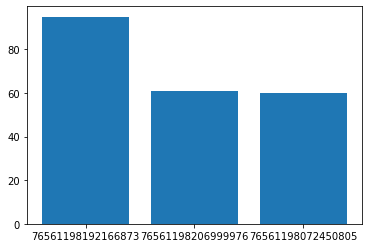

In [36]:
authorMOD_sortedHead = authorMOD.sort_values(["Numero Modifiche"], ascending=False).head(3)
authorMOD_sortedHead
df.plt.bar(list(map(str,authorMOD_sortedHead.index)), authorMOD_sortedHead["Numero Modifiche"]);

In [37]:
authorMOD_sortedHead

,Numero Modifiche
author.steamid,
76561198192166873,95
76561198206999976,61
76561198072450805,60


Top 3 utenti con più recensioni aggiornate (Questa lista prende in considerazione il numero totale di recensioni e il numero di recensioni aggiornate)

In [6]:
authorNOMOD = author_steamId_AND_timedelta.loc[author_steamId_AND_timedelta["Numero Modifiche"] == "0", ["author.steamid", "Numero Modifiche"]]
authorNOMOD = authorNOMOD.rename({"Numero Modifiche": "Numero non modifiche"}, axis=1)
authorNOMOD = authorNOMOD.groupby(["author.steamid"]).count()
authorNOMOD

,Numero non modifiche
author.steamid,
76561197960265730,1
76561197960265745,2
76561197960265747,1
76561197960265778,2
76561197960265781,4
...,...
76561199133107792,1
76561199133134170,1
76561199133159367,1


In [15]:
AuthorTOT = author_steamId_AND_timedelta.groupby(["author.steamid"]).count()
AuthorTOT = AuthorTOT.rename({"Numero Modifiche": "TOT"}, axis=1)
AuthorTOT["Numero modifiche"] = authorMOD
AuthorTOT["Numero non modifiche"] = authorNOMOD
AuthorTOT.head(10)

,TOT,Numero modifiche,Numero non modifiche
author.steamid,,,
76561197960265730,1,NaN,1.0
76561197960265745,2,NaN,2.0
76561197960265747,1,NaN,1.0
76561197960265778,2,NaN,2.0
76561197960265781,4,NaN,4.0
76561197960265806,1,NaN,1.0
76561197960265817,1,NaN,1.0
76561197960265822,3,1.0,2.0
76561197960265836,1,NaN,1.0


In [19]:
perc = AuthorTOT.apply(lambda row: row["Numero modifiche"]*100/row["TOT"],axis=1)
AuthorTOT["Percentuale di modifica"] = perc
AuthorTOT

,TOT,Numero modifiche,Numero non modifiche,Percentuale di modifica
author.steamid,,,,
76561197960265730,1,NaN,1.0,NaN
76561197960265745,2,NaN,2.0,NaN
76561197960265747,1,NaN,1.0,NaN
76561197960265778,2,NaN,2.0,NaN
76561197960265781,4,NaN,4.0,NaN
...,...,...,...,...
76561199133107792,1,NaN,1.0,NaN
76561199133134170,1,NaN,1.0,NaN
76561199133159367,1,NaN,1.0,NaN


In [34]:
x =AuthorTOT.sort_values(["Percentuale di modifica", "TOT"], ascending=False).head(3)

In [35]:
x

,TOT,Numero modifiche,Numero non modifiche,Percentuale di modifica
author.steamid,,,,
76561198072450805,60,60.0,NaN,100.0
76561197972642306,43,43.0,NaN,100.0
76561198006784126,35,35.0,NaN,100.0
